In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import RocCurveDisplay

In [2]:
data = pd.read_csv("phishing.csv")

<AxesSubplot:ylabel='Frequency'>

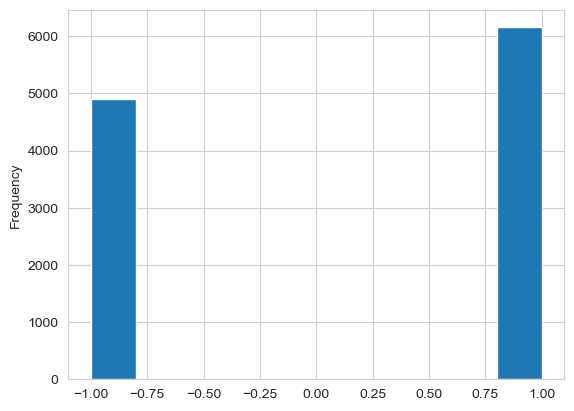

In [3]:
data['class'].plot(kind='hist')

In [18]:
data = data.iloc[:, 1:]

In [20]:
data.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


In [21]:
phishing_data = data[data['class'] == -1]

In [41]:
X_phish = phishing_data.iloc[:, :-1]
y_phish = phishing_data.iloc[:, -1]

In [23]:
clear_data = data[data['class'] == 1]

In [42]:
X_clr = clear_data.iloc[:, :-1]
y_clr = clear_data.iloc[:, -1]

In [25]:
from sklearn.manifold import TSNE

In [26]:
tsne = TSNE(init='random', perplexity=10).fit_transform(data.iloc[:,:-1])

C:\Users\shars\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [27]:
df_print = pd.DataFrame()
df_print['y'] = data.iloc[:,-1]
df_print['comp-1'] = tsne[:,0]
df_print['comp-2'] = tsne[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

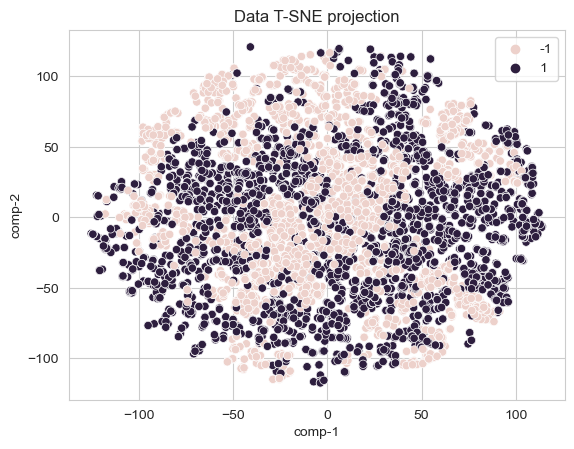

In [29]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df_print.y.tolist(),
                data=df_print).set(title="Data T-SNE projection")

In [30]:
from sklearn.svm import OneClassSVM

In [43]:
svm = OneClassSVM()

In [44]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

In [45]:
svm.fit(X_clr)

OneClassSVM()

In [46]:
pred = svm.predict(X_phish)

In [47]:
print("Accuracy: {}".format(accuracy_score(pred, y_phish)))
print("Recall: {}".format(recall_score(pred, y_phish, average='weighted')))
print("Precision: {}".format(precision_score(pred, y_phish, average='weighted')))
print("f1: {}".format(f1_score(pred, y_phish, average='weighted')))

Accuracy: 0.8311210945476822
Recall: 0.8311210945476822
Precision: 0.6907622738021374
f1: 0.7544692438516932


C:\Users\shars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.ensemble import IsolationForest

In [49]:
isolation_forest = IsolationForest()

In [50]:
isolation_forest.fit(X_clr)

IsolationForest()

In [52]:
pred = isolation_forest.predict(X_phish)

In [53]:
print("Accuracy: {}".format(accuracy_score(pred, y_phish)))
print("Recall: {}".format(recall_score(pred, y_phish, average='weighted')))
print("Precision: {}".format(precision_score(pred, y_phish, average='weighted')))
print("f1: {}".format(f1_score(pred, y_phish, average='weighted')))

Accuracy: 0.6450888298958546
Recall: 0.6450888298958546
Precision: 0.4161395984564028
f1: 0.5059174810429504


C:\Users\shars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
from sklearn.neighbors import LocalOutlierFactor

In [61]:
lof = LocalOutlierFactor(novelty=True)

In [62]:
lof.fit(X_clr)

LocalOutlierFactor(novelty=True)

In [63]:
pred = lof.predict(X_phish)

C:\Users\shars\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [64]:
print("Accuracy: {}".format(accuracy_score(pred, y_phish)))
print("Recall: {}".format(recall_score(pred, y_phish, average='weighted')))
print("Precision: {}".format(precision_score(pred, y_phish, average='weighted')))
print("f1: {}".format(f1_score(pred, y_phish, average='weighted')))

Accuracy: 0.22830304267919135
Recall: 0.22830304267919135
Precision: 0.052122279296576667
f1: 0.08486876200011169


C:\Users\shars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
